# Project 1: SAT & ACT Analysis

#### Feedback:
- Leave more comments & help explicitly state your inferences from Charts & Tables; helps the team better collaborate & work
- Ensure charts have good scaling (y-axis for adjacent charts / trend lines appear on the same scale)
- Charts should have clearer labels & more spacing/padding between each other (#77 & #79)

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

To analyse and give recommendations on where the organization should focus their efforts to improve SAT participation rates.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', None)

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
#reading .csv files into DataFrame
sat17 = pd.read_csv('../data/sat_2017.csv')
act17 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat17.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act17.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:

SAT_2017 data:
This data set has 5 columns, basically showing the SAT 2017 participation rate from each state, as well as the average scores for the Evidence-Based Reading and Writing(ERW) component, the Math component and a Total score, which is the sum of the ERW and Math component scores.

ACT_2017 data:
This data set has 7 columns, showing the details of the average score of each state for the ACT 2017 exam. You can tell that the ACT exam has more components than the SAT exam. These components consists of English, Math, Reading as well as Science. There is also a composite score which is should be the average of the 4 test scores mentioned earlier.

#### 4a. Does the data look complete? 

In [5]:
#checking through the data for any null values
sat17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [6]:
act17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


Answer:

Based on initial observation, there seems to be no missing values, therefore data looks to be complete.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [7]:
#looking through to see if any numbers seem weird.
sat17.describe()
#there might be an issue with the math figures. Standard deviation is much higher compared to the ERW figures.
#also, note that the min observed was only 52.

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [8]:
sat17[sat17['Math'] == 52]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [9]:
act17.describe()
#Science component has a minimum of 2.3 which is way lower than the rest. 

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [10]:
act17[act17['Science']==2.3]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


Answer:

SAT:
The minimum SAT score possible is 400, while the maximum is 1600. This means that the minimum for each section is 200, while the maximum is 800.

ACT:
Each section, as well as the overall composite score, are scored between 1 and 36.

Based on my observation, there seems to be some issues with the Maryland scores for both the SAT and ACT scores. 

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [11]:
#code
sat17.iloc[20,3] = 524

sat17.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,556.882353,1126.098039
std,45.666901,47.121395,92.494812
min,482.000000,468.000000,950.000000
25%,533.500000,523.500000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [12]:
act17.iloc[21,5] = 23.2

act17.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.442308
std,2.332132,1.963602,2.048672,1.723351
min,16.300000,18.000000,18.100000,18.200000
25%,19.000000,19.400000,20.475000,19.975000
50%,20.550000,20.900000,21.700000,21.300000
75%,23.300000,23.100000,24.125000,23.200000
max,25.500000,25.300000,26.000000,24.900000


#### 5. What are your data types? 
Display the data types of each feature. 

In [13]:
#code
sat17.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [14]:
act17.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [15]:
act17['Composite'].unique()

array(['21.0', '19.2', '19.8', '19.7', '19.4', '22.8', '20.8', '25.2',
       '24.1', '24.2', '21.4', '19.0', '22.3', '22.6', '21.9', '21.7',
       '20.0', '19.5', '24.3', '23.6', '25.4', '21.5', '18.6', '20.4',
       '20.3', '17.8', '25.5', '23.9', '19.1', '22.0', '21.8', '23.7',
       '24.0', '18.7', '20.7', '23.8', '20.5', '20.2x'], dtype=object)

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

Considering that the Composite column in the ACT data should be floats, it seems odd that they returned a string type. Upon closer inspection, it seems that one of the value had a string object.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [16]:
#code
def convert_percentage(value):
    if type(value) == str:
        value = value.replace('%','')
    return int(value)

In [17]:
sat17['Participation'] = sat17['Participation'].map(convert_percentage)

sat17.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


In [18]:
act17['Participation'] = act17['Participation'].map(convert_percentage)

act17.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


- Fix any individual values preventing other columns from being the appropriate type.

In [19]:
#code
act17[act17['Composite'] == '20.2x']

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100,19.4,19.8,20.8,20.6,20.2x


In [20]:
act17.iloc[51,6] = 20.2

act17.loc[51]

State            Wyoming
Participation        100
English             19.4
Math                19.8
Reading             20.8
Science             20.6
Composite           20.2
Name: 51, dtype: object

- Finish your data modifications by making sure the columns are now typed appropriately.

In [21]:
#code
act17['Composite'] = act17['Composite'].astype(float)
act17.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

- Display the data types again to confirm they are correct.

In [22]:
#Code:
sat17.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [23]:
act17.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [24]:
#code
#creating the column names
sat17_column_names = ['state', 'sat17_participation_percentage', 'sat17_erw', 'sat17_math', 'sat17_total']
act17_column_names = ['state', 'act17_participation_percentage', 'act17_english', 'act17_math', 'act17_reading',
                      'act17_science', 'act17_composite']


sat17.columns = sat17_column_names
act17.columns = act17_column_names

In [25]:
sat17.head()

,state,sat17_participation_percentage,sat17_erw,sat17_math,sat17_total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


In [26]:
act17.head()

,state,act17_participation_percentage,act17_english,act17_math,act17_reading,act17_science,act17_composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [27]:
#code
sat17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
state                             51 non-null object
sat17_participation_percentage    51 non-null int64
sat17_erw                         51 non-null int64
sat17_math                        51 non-null int64
sat17_total                       51 non-null int64
dtypes: int64(4), object(1)
memory usage: 2.1+ KB


In [28]:
act17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
state                             52 non-null object
act17_participation_percentage    52 non-null int64
act17_english                     52 non-null float64
act17_math                        52 non-null float64
act17_reading                     52 non-null float64
act17_science                     52 non-null float64
act17_composite                   52 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.0+ KB


In [29]:
act17.head()

,state,act17_participation_percentage,act17_english,act17_math,act17_reading,act17_science,act17_composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4


In [30]:
act17.drop(0, axis=0, inplace=True)

act17.head()

,state,act17_participation_percentage,act17_english,act17_math,act17_reading,act17_science,act17_composite
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4
5,California,31,22.5,22.7,23.1,22.2,22.8


In [31]:
act17.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 7 columns):
state                             51 non-null object
act17_participation_percentage    51 non-null int64
act17_english                     51 non-null float64
act17_math                        51 non-null float64
act17_reading                     51 non-null float64
act17_science                     51 non-null float64
act17_composite                   51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.2+ KB


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [32]:
#Code:
combined17 = pd.merge(left=sat17, right=act17, on='state', how='outer')

combined17

,state,sat17_participation_percentage,sat17_erw,sat17_math,sat17_total,act17_participation_percentage,act17_english,act17_math,act17_reading,act17_science,act17_composite
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8
5,Colorado,11,606,595,1201,100,20.1,20.3,21.2,20.9,20.8
6,Connecticut,100,530,512,1041,31,25.5,24.6,25.6,24.6,25.2
7,Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1
8,District of Columbia,100,482,468,950,32,24.4,23.5,24.9,23.5,24.2
9,Florida,83,520,497,1017,73,19.0,19.4,21.0,19.4,19.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [33]:
#code
combined17.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [34]:
#reading data into csv
sat18 = pd.read_csv('../data/sat_2018.csv')
act18 = pd.read_csv('../data/act_2018_updated.csv')

#do note that I have already changed some of the values in the csv as I was checking the data against
#online records and gathering some additional data. 

In [35]:
sat18.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total,SAT Takers
0,Alabama,6%,595,571,1166,2878
1,Alaska,43%,562,544,1106,3334
2,Arizona,29%,577,572,1149,20188
3,Arkansas,5%,592,576,1169,1591
4,California,60%,540,536,1076,262228


In [36]:
act18.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [37]:
#checking to see if there are any null values.
sat18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
SAT Takers                            51 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.5+ KB


In [38]:
act18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                            51 non-null object
Percentage of Students Tested    51 non-null int64
Average Composite Score          51 non-null float64
Average English Score            51 non-null float64
Average Math Score               51 non-null float64
Average Reading Score            51 non-null float64
Average Science Score            51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [39]:
#checking statistics of 2018 to see if there are any anomalies
sat18.describe()

,Evidence-Based Reading and Writing,Math,Total,SAT Takers
count,51.000000,51.000000,51.000000,51.000000
mean,567.294118,557.254902,1124.666667,39032.392157
std,45.317676,48.887562,93.868561,60442.176084
min,497.000000,480.000000,977.000000,148.000000
25%,535.000000,521.500000,1062.500000,2223.500000
50%,552.000000,547.000000,1099.000000,10161.000000
75%,616.500000,600.500000,1220.000000,51974.500000
max,643.000000,655.000000,1298.000000,262228.000000


In [40]:
act18.describe()

,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.647059,21.498039,20.988235,21.125490,22.015686,21.345098
std,34.080976,2.117686,2.446356,2.035765,2.167245,1.870114
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,100.000000,23.650000,23.700000,23.150000,24.100000,23.050000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [41]:
#converting the percentage of exam takers to numeric type.
sat18['Participation'] = sat18['Participation'].map(convert_percentage)

sat18.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
SAT Takers                             int64
dtype: object

In [42]:
act18['Percentage of Students Tested'] = act18['Percentage of Students Tested'].map(convert_percentage)

act18.dtypes

State                             object
Percentage of Students Tested      int64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [43]:
#now that the data looks to be the appropriate type, we are going to rename the columns.
sat18_column_names = ['state', 'sat18_participation_percentage', 'sat18_erw', 'sat18_math', 'sat18_total', 'sat18_sat_takers']

act18_column_names = ['state', 'act18_participation_percentage', 'act18_composite', 'act18_english', 'act18_math',
                     'act18_reading', 'act18_science']

sat18.columns = sat18_column_names
act18.columns = act18_column_names

In [44]:
sat18.columns

Index(['state', 'sat18_participation_percentage', 'sat18_erw', 'sat18_math',
       'sat18_total', 'sat18_sat_takers'],
      dtype='object')

In [45]:
act18.columns

Index(['state', 'act18_participation_percentage', 'act18_composite',
       'act18_english', 'act18_math', 'act18_reading', 'act18_science'],
      dtype='object')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [46]:
#combing 2018 SAT and ACT data
combined18 = pd.merge(left=sat18, right=act18, on='state', how='outer')

combined18

,state,sat18_participation_percentage,sat18_erw,sat18_math,sat18_total,sat18_sat_takers,act18_participation_percentage,act18_composite,act18_english,act18_math,act18_reading,act18_science
0,Alabama,6,595,571,1166,2878,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,43,562,544,1106,3334,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,29,577,572,1149,20188,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,5,592,576,1169,1591,100,19.4,19.1,18.9,19.7,19.4
4,California,60,540,536,1076,262228,27,22.7,22.5,22.5,23.0,22.1
5,Colorado,100,519,506,1025,58790,30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,100,535,519,1053,44700,26,25.6,26.0,24.8,26.1,24.9
7,Delaware,100,505,492,998,11055,17,23.8,23.7,23.1,24.5,23.4
8,District of Columbia,92,497,480,977,4985,32,23.6,23.7,22.7,24.4,23.0
9,Florida,97,522,493,1014,176746,66,19.9,19.2,19.3,21.1,19.5


In [47]:
#combining 2017 and 2018 data into one final solid table!
final_data = pd.merge(left=combined17, right=combined18, on='state', how='outer')

final_data

,state,sat17_participation_percentage,sat17_erw,sat17_math,sat17_total,act17_participation_percentage,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation_percentage,sat18_erw,sat18_math,sat18_total,sat18_sat_takers,act18_participation_percentage,act18_composite,act18_english,act18_math,act18_reading,act18_science
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,6,595,571,1166,2878,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8,43,562,544,1106,3334,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7,29,577,572,1149,20188,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4,5,592,576,1169,1591,100,19.4,19.1,18.9,19.7,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8,60,540,536,1076,262228,27,22.7,22.5,22.5,23.0,22.1
5,Colorado,11,606,595,1201,100,20.1,20.3,21.2,20.9,20.8,100,519,506,1025,58790,30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,100,530,512,1041,31,25.5,24.6,25.6,24.6,25.2,100,535,519,1053,44700,26,25.6,26.0,24.8,26.1,24.9
7,Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1,100,505,492,998,11055,17,23.8,23.7,23.1,24.5,23.4
8,District of Columbia,100,482,468,950,32,24.4,23.5,24.9,23.5,24.2,92,497,480,977,4985,32,23.6,23.7,22.7,24.4,23.0
9,Florida,83,520,497,1017,73,19.0,19.4,21.0,19.4,19.8,97,522,493,1014,176746,66,19.9,19.2,19.3,21.1,19.5


In [48]:
#saving data to csv
final_data.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [49]:
#Code:
final_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sat17_participation_percentage,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat17_erw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat17_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat17_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act17_participation_percentage,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act17_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act17_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act17_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act17_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act17_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [50]:
#code
def std_dev(values):
    no_of_elements = len(values)
    mean_values = sum(values) / no_of_elements
    sum_variance = 0
    for value in values:
        variance = (value - mean_values)**2
        sum_variance += variance
    standard_deviation = (sum_variance/no_of_elements)**(0.5)
    return standard_deviation

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [51]:
#Code:
column_analysis = final_data.columns[1:]

sd = {x: std_dev(final_data[x]) for x in column_analysis }

sd

{'sat17_participation_percentage': 34.92907076664508,
 'sat17_erw': 45.21697020437866,
 'sat17_math': 46.65713364485503,
 'sat17_total': 91.58351056778743,
 'act17_participation_percentage': 31.824175751231806,
 'act17_english': 2.3304876369363363,
 'act17_math': 1.9624620273436781,
 'act17_reading': 2.0469029314842646,
 'act17_science': 1.7222161451443676,
 'act17_composite': 2.000786081581989,
 'sat18_participation_percentage': 37.63965409204986,
 'sat18_erw': 44.87118561762388,
 'sat18_math': 48.40589946919447,
 'sat18_total': 92.94372462792965,
 'sat18_sat_takers': 59846.67214201357,
 'act18_participation_percentage': 33.745194881997506,
 'act18_composite': 2.0968220768561987,
 'act18_english': 2.4222536143202795,
 'act18_math': 2.015707255555717,
 'act18_reading': 2.145891884510421,
 'act18_science': 1.8516885484833543}

In [52]:
sd_numpy = {x: np.std(final_data[x]) for x in column_analysis}

sd_numpy

{'sat17_participation_percentage': 34.92907076664508,
 'sat17_erw': 45.21697020437866,
 'sat17_math': 46.65713364485503,
 'sat17_total': 91.58351056778743,
 'act17_participation_percentage': 31.824175751231806,
 'act17_english': 2.3304876369363363,
 'act17_math': 1.9624620273436781,
 'act17_reading': 2.0469029314842646,
 'act17_science': 1.7222161451443676,
 'act17_composite': 2.000786081581989,
 'sat18_participation_percentage': 37.63965409204986,
 'sat18_erw': 44.87118561762388,
 'sat18_math': 48.40589946919447,
 'sat18_total': 92.94372462792965,
 'sat18_sat_takers': 59846.67214201357,
 'act18_participation_percentage': 33.745194881997506,
 'act18_composite': 2.0968220768561987,
 'act18_english': 2.4222536143202795,
 'act18_math': 2.015707255555717,
 'act18_reading': 2.145891884510421,
 'act18_science': 1.8516885484833543}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer

The standard deviation output from my manual calculation does not match up with the output from pandas describe, but they do appear to be the same as numpy's std method. Upon further research, it seems this is so because the pandas formula divides the summation by n-1 whereas numpy divides by n(same as our manual formula).

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [53]:
#code
#highest participation rate for 2017 SAT
final_data.sort_values(by='sat17_participation_percentage', axis=0, ascending=False).head()

,state,sat17_participation_percentage,sat17_erw,sat17_math,sat17_total,act17_participation_percentage,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation_percentage,sat18_erw,sat18_math,sat18_total,sat18_sat_takers,act18_participation_percentage,act18_composite,act18_english,act18_math,act18_reading,act18_science
8,District of Columbia,100,482,468,950,32,24.4,23.5,24.9,23.5,24.2,92,497,480,977,4985,32,23.6,23.7,22.7,24.4,23.0
22,Michigan,100,509,495,1005,29,24.1,23.7,24.5,23.8,24.1,100,511,499,1011,115281,22,24.4,24.5,23.9,24.7,23.9
6,Connecticut,100,530,512,1041,31,25.5,24.6,25.6,24.6,25.2,100,535,519,1053,44700,26,25.6,26.0,24.8,26.1,24.9
7,Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1,100,505,492,998,11055,17,23.8,23.7,23.1,24.5,23.4
29,New Hampshire,96,532,520,1052,18,25.4,25.1,26.0,24.9,25.5,96,535,528,1063,14834,16,25.1,25.1,24.7,25.6,24.4


In [54]:
#lowest participation rate for 2017 SAT
final_data.sort_values(by='sat17_participation_percentage', axis=0, ascending=True).head()

,state,sat17_participation_percentage,sat17_erw,sat17_math,sat17_total,act17_participation_percentage,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation_percentage,sat18_erw,sat18_math,sat18_total,sat18_sat_takers,act18_participation_percentage,act18_composite,act18_english,act18_math,act18_reading,act18_science
34,North Dakota,2,635,621,1256,98,19.0,20.4,20.5,20.6,20.3,2,640,643,1283,148,98,20.3,19.1,20.3,20.7,20.5
24,Mississippi,2,634,607,1242,100,18.2,18.1,18.8,18.8,18.6,3,630,606,1236,806,100,18.6,18.2,18.1,18.9,18.6
15,Iowa,2,641,635,1275,67,21.2,21.3,22.6,22.1,21.9,3,634,631,1265,994,68,21.8,21.0,21.2,22.5,22.0
25,Missouri,3,640,631,1271,100,19.8,19.9,20.8,20.5,20.4,4,633,629,1262,2420,100,20.0,19.5,19.7,20.5,20.0
44,Utah,3,624,614,1238,100,19.5,19.9,20.8,20.6,20.3,4,618,612,1230,1425,100,20.4,19.7,19.9,20.9,20.5


In [55]:
#highest participation rate for 2018 SAT
final_data.sort_values(by='sat18_participation_percentage', axis=0, ascending=False).head()

,state,sat17_participation_percentage,sat17_erw,sat17_math,sat17_total,act17_participation_percentage,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation_percentage,sat18_erw,sat18_math,sat18_total,sat18_sat_takers,act18_participation_percentage,act18_composite,act18_english,act18_math,act18_reading,act18_science
5,Colorado,11,606,595,1201,100,20.1,20.3,21.2,20.9,20.8,100,519,506,1025,58790,30,23.9,23.9,23.2,24.4,23.5
6,Connecticut,100,530,512,1041,31,25.5,24.6,25.6,24.6,25.2,100,535,519,1053,44700,26,25.6,26.0,24.8,26.1,24.9
7,Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1,100,505,492,998,11055,17,23.8,23.7,23.1,24.5,23.4
22,Michigan,100,509,495,1005,29,24.1,23.7,24.5,23.8,24.1,100,511,499,1011,115281,22,24.4,24.5,23.9,24.7,23.9
12,Idaho,93,513,493,1005,38,21.9,21.8,23.0,22.1,22.3,100,508,493,1001,20484,36,22.3,21.9,21.6,23.2,22.1


In [56]:
#lowest participation rate for 2018 SAT
final_data.sort_values(by='sat18_participation_percentage', axis=0, ascending=True).head()

,state,sat17_participation_percentage,sat17_erw,sat17_math,sat17_total,act17_participation_percentage,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation_percentage,sat18_erw,sat18_math,sat18_total,sat18_sat_takers,act18_participation_percentage,act18_composite,act18_english,act18_math,act18_reading,act18_science
34,North Dakota,2,635,621,1256,98,19.0,20.4,20.5,20.6,20.3,2,640,643,1283,148,98,20.3,19.1,20.3,20.7,20.5
50,Wyoming,3,626,604,1230,100,19.4,19.8,20.8,20.6,20.2,3,633,625,1257,169,100,20.0,19.0,19.7,20.6,20.3
41,South Dakota,3,612,603,1216,80,20.7,21.5,22.3,22.0,21.8,3,622,618,1241,260,77,21.9,20.8,21.6,22.4,22.2
27,Nebraska,3,629,625,1253,84,20.9,20.9,21.9,21.5,21.4,3,629,623,1252,688,100,20.1,19.4,19.8,20.4,20.1
49,Wisconsin,3,642,649,1291,100,19.7,20.4,20.6,20.9,20.5,3,641,653,1294,1923,100,20.5,19.8,20.3,20.6,20.8


In [57]:
#highest participation rate for 2017 ACT
final_data.sort_values(by='act17_participation_percentage', axis=0, ascending=False).head()

,state,sat17_participation_percentage,sat17_erw,sat17_math,sat17_total,act17_participation_percentage,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation_percentage,sat18_erw,sat18_math,sat18_total,sat18_sat_takers,act18_participation_percentage,act18_composite,act18_english,act18_math,act18_reading,act18_science
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,6,595,571,1166,2878,100,19.1,18.9,18.3,19.6,19.0
17,Kentucky,4,631,616,1247,100,19.6,19.4,20.5,20.1,20.0,4,630,618,1248,1925,100,20.2,19.9,19.7,20.8,20.1
49,Wisconsin,3,642,649,1291,100,19.7,20.4,20.6,20.9,20.5,3,641,653,1294,1923,100,20.5,19.8,20.3,20.6,20.8
44,Utah,3,624,614,1238,100,19.5,19.9,20.8,20.6,20.3,4,618,612,1230,1425,100,20.4,19.7,19.9,20.9,20.5
42,Tennessee,5,623,604,1228,100,19.5,19.2,20.1,19.9,19.8,6,624,607,1231,4181,100,19.6,19.4,19.1,19.9,19.6


In [58]:
#lowest participation rate for 2017 ACT
final_data.sort_values(by='act17_participation_percentage', axis=0, ascending=True).head()

,state,sat17_participation_percentage,sat17_erw,sat17_math,sat17_total,act17_participation_percentage,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation_percentage,sat18_erw,sat18_math,sat18_total,sat18_sat_takers,act18_participation_percentage,act18_composite,act18_english,act18_math,act18_reading,act18_science
19,Maine,95,513,499,1012,8,24.2,24.0,24.8,23.7,24.3,99,512,501,1013,14310,7,24.0,23.8,23.6,24.7,23.4
29,New Hampshire,96,532,520,1052,18,25.4,25.1,26.0,24.9,25.5,96,535,528,1063,14834,16,25.1,25.1,24.7,25.6,24.4
7,Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1,100,505,492,998,11055,17,23.8,23.7,23.1,24.5,23.4
39,Rhode Island,71,539,524,1062,21,24.0,23.3,24.7,23.4,24.0,97,513,505,1018,10161,15,24.2,24.4,23.6,25.0,23.5
38,Pennsylvania,65,540,531,1071,23,23.4,23.4,24.2,23.3,23.7,70,547,539,1086,96740,20,23.5,23.3,23.2,24.0,23.1


In [59]:
#highest participation rate for 2018 ACT
final_data.sort_values(by='act18_participation_percentage', axis=0, ascending=False).head()

,state,sat17_participation_percentage,sat17_erw,sat17_math,sat17_total,act17_participation_percentage,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation_percentage,sat18_erw,sat18_math,sat18_total,sat18_sat_takers,act18_participation_percentage,act18_composite,act18_english,act18_math,act18_reading,act18_science
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,6,595,571,1166,2878,100,19.1,18.9,18.3,19.6,19.0
17,Kentucky,4,631,616,1247,100,19.6,19.4,20.5,20.1,20.0,4,630,618,1248,1925,100,20.2,19.9,19.7,20.8,20.1
49,Wisconsin,3,642,649,1291,100,19.7,20.4,20.6,20.9,20.5,3,641,653,1294,1923,100,20.5,19.8,20.3,20.6,20.8
44,Utah,3,624,614,1238,100,19.5,19.9,20.8,20.6,20.3,4,618,612,1230,1425,100,20.4,19.7,19.9,20.9,20.5
42,Tennessee,5,623,604,1228,100,19.5,19.2,20.1,19.9,19.8,6,624,607,1231,4181,100,19.6,19.4,19.1,19.9,19.6


In [60]:
#lowest participation rate for 2018 ACT
final_data.sort_values(by='act18_participation_percentage', axis=0, ascending=True).head()

,state,sat17_participation_percentage,sat17_erw,sat17_math,sat17_total,act17_participation_percentage,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation_percentage,sat18_erw,sat18_math,sat18_total,sat18_sat_takers,act18_participation_percentage,act18_composite,act18_english,act18_math,act18_reading,act18_science
19,Maine,95,513,499,1012,8,24.2,24.0,24.8,23.7,24.3,99,512,501,1013,14310,7,24.0,23.8,23.6,24.7,23.4
39,Rhode Island,71,539,524,1062,21,24.0,23.3,24.7,23.4,24.0,97,513,505,1018,10161,15,24.2,24.4,23.6,25.0,23.5
29,New Hampshire,96,532,520,1052,18,25.4,25.1,26.0,24.9,25.5,96,535,528,1063,14834,16,25.1,25.1,24.7,25.6,24.4
7,Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1,100,505,492,998,11055,17,23.8,23.7,23.1,24.5,23.4
38,Pennsylvania,65,540,531,1071,23,23.4,23.4,24.2,23.3,23.7,70,547,539,1086,96740,20,23.5,23.3,23.2,24.0,23.1


In [61]:
#Highest mean total for 2017 SAT
final_data.sort_values(by='sat17_total', axis=0, ascending=False).head()

,state,sat17_participation_percentage,sat17_erw,sat17_math,sat17_total,act17_participation_percentage,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation_percentage,sat18_erw,sat18_math,sat18_total,sat18_sat_takers,act18_participation_percentage,act18_composite,act18_english,act18_math,act18_reading,act18_science
23,Minnesota,3,644,651,1295,100,20.4,21.5,21.8,21.6,21.5,4,643,655,1298,2464,99,21.3,20.2,21.4,21.7,21.4
49,Wisconsin,3,642,649,1291,100,19.7,20.4,20.6,20.9,20.5,3,641,653,1294,1923,100,20.5,19.8,20.3,20.6,20.8
15,Iowa,2,641,635,1275,67,21.2,21.3,22.6,22.1,21.9,3,634,631,1265,994,68,21.8,21.0,21.2,22.5,22.0
25,Missouri,3,640,631,1271,100,19.8,19.9,20.8,20.5,20.4,4,633,629,1262,2420,100,20.0,19.5,19.7,20.5,20.0
16,Kansas,4,632,628,1260,73,21.1,21.3,22.3,21.7,21.7,4,633,631,1265,1419,71,21.6,21.0,21.1,22.3,21.5


In [62]:
#lowest mean total for 2017 SAT
final_data.sort_values(by='sat17_total', axis=0, ascending=True).head()

,state,sat17_participation_percentage,sat17_erw,sat17_math,sat17_total,act17_participation_percentage,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation_percentage,sat18_erw,sat18_math,sat18_total,sat18_sat_takers,act18_participation_percentage,act18_composite,act18_english,act18_math,act18_reading,act18_science
8,District of Columbia,100,482,468,950,32,24.4,23.5,24.9,23.5,24.2,92,497,480,977,4985,32,23.6,23.7,22.7,24.4,23.0
7,Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1,100,505,492,998,11055,17,23.8,23.7,23.1,24.5,23.4
12,Idaho,93,513,493,1005,38,21.9,21.8,23.0,22.1,22.3,100,508,493,1001,20484,36,22.3,21.9,21.6,23.2,22.1
22,Michigan,100,509,495,1005,29,24.1,23.7,24.5,23.8,24.1,100,511,499,1011,115281,22,24.4,24.5,23.9,24.7,23.9
19,Maine,95,513,499,1012,8,24.2,24.0,24.8,23.7,24.3,99,512,501,1013,14310,7,24.0,23.8,23.6,24.7,23.4


In [63]:
#highest mean total for 2018 SAT
final_data.sort_values(by='sat18_total', axis=0, ascending=False).head()

,state,sat17_participation_percentage,sat17_erw,sat17_math,sat17_total,act17_participation_percentage,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation_percentage,sat18_erw,sat18_math,sat18_total,sat18_sat_takers,act18_participation_percentage,act18_composite,act18_english,act18_math,act18_reading,act18_science
23,Minnesota,3,644,651,1295,100,20.4,21.5,21.8,21.6,21.5,4,643,655,1298,2464,99,21.3,20.2,21.4,21.7,21.4
49,Wisconsin,3,642,649,1291,100,19.7,20.4,20.6,20.9,20.5,3,641,653,1294,1923,100,20.5,19.8,20.3,20.6,20.8
34,North Dakota,2,635,621,1256,98,19.0,20.4,20.5,20.6,20.3,2,640,643,1283,148,98,20.3,19.1,20.3,20.7,20.5
15,Iowa,2,641,635,1275,67,21.2,21.3,22.6,22.1,21.9,3,634,631,1265,994,68,21.8,21.0,21.2,22.5,22.0
16,Kansas,4,632,628,1260,73,21.1,21.3,22.3,21.7,21.7,4,633,631,1265,1419,71,21.6,21.0,21.1,22.3,21.5


In [64]:
#lowest mean total for 2018 SAT
final_data.sort_values(by='sat18_total', axis=0, ascending=True).head()

,state,sat17_participation_percentage,sat17_erw,sat17_math,sat17_total,act17_participation_percentage,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation_percentage,sat18_erw,sat18_math,sat18_total,sat18_sat_takers,act18_participation_percentage,act18_composite,act18_english,act18_math,act18_reading,act18_science
8,District of Columbia,100,482,468,950,32,24.4,23.5,24.9,23.5,24.2,92,497,480,977,4985,32,23.6,23.7,22.7,24.4,23.0
7,Delaware,100,503,492,996,18,24.1,23.4,24.8,23.6,24.1,100,505,492,998,11055,17,23.8,23.7,23.1,24.5,23.4
48,West Virginia,14,558,528,1086,69,20.0,19.4,21.2,20.5,20.4,28,513,486,999,5058,65,20.3,19.8,19.4,21.3,20.4
12,Idaho,93,513,493,1005,38,21.9,21.8,23.0,22.1,22.3,100,508,493,1001,20484,36,22.3,21.9,21.6,23.2,22.1
22,Michigan,100,509,495,1005,29,24.1,23.7,24.5,23.8,24.1,100,511,499,1011,115281,22,24.4,24.5,23.9,24.7,23.9


In [65]:
#highest mean composite for 2017 ACT
final_data.sort_values(by='act17_composite', axis=0, ascending=False).head()

,state,sat17_participation_percentage,sat17_erw,sat17_math,sat17_total,act17_participation_percentage,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation_percentage,sat18_erw,sat18_math,sat18_total,sat18_sat_takers,act18_participation_percentage,act18_composite,act18_english,act18_math,act18_reading,act18_science
29,New Hampshire,96,532,520,1052,18,25.4,25.1,26.0,24.9,25.5,96,535,528,1063,14834,16,25.1,25.1,24.7,25.6,24.4
21,Massachusetts,76,555,551,1107,29,25.4,25.3,25.9,24.7,25.4,80,562,563,1125,59382,25,25.5,25.5,25.2,25.9,24.7
6,Connecticut,100,530,512,1041,31,25.5,24.6,25.6,24.6,25.2,100,535,519,1053,44700,26,25.6,26.0,24.8,26.1,24.9
19,Maine,95,513,499,1012,8,24.2,24.0,24.8,23.7,24.3,99,512,501,1013,14310,7,24.0,23.8,23.6,24.7,23.4
8,District of Columbia,100,482,468,950,32,24.4,23.5,24.9,23.5,24.2,92,497,480,977,4985,32,23.6,23.7,22.7,24.4,23.0


In [66]:
#lowest mean composite for 2017 ACT
final_data.sort_values(by='act17_composite', axis=0, ascending=True).head()

,state,sat17_participation_percentage,sat17_erw,sat17_math,sat17_total,act17_participation_percentage,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation_percentage,sat18_erw,sat18_math,sat18_total,sat18_sat_takers,act18_participation_percentage,act18_composite,act18_english,act18_math,act18_reading,act18_science
28,Nevada,26,563,553,1116,100,16.3,18.0,18.1,18.2,17.8,23,574,566,1140,5588,100,17.7,16.6,17.8,18.0,17.9
24,Mississippi,2,634,607,1242,100,18.2,18.1,18.8,18.8,18.6,3,630,606,1236,806,100,18.6,18.2,18.1,18.9,18.6
40,South Carolina,50,543,521,1064,100,17.5,18.6,19.1,18.9,18.7,55,547,523,1070,25390,100,18.3,17.3,18.2,18.6,18.5
11,Hawaii,55,544,541,1085,90,17.8,19.2,19.2,19.3,19.0,56,550,549,1099,7880,89,18.9,18.2,19.0,19.1,19.0
33,North Carolina,49,546,535,1081,100,17.8,19.3,19.6,19.3,19.1,52,554,543,1098,54987,100,19.1,18.0,19.3,19.5,19.2


In [67]:
#highest mean composite for 2018 ACT
final_data.sort_values(by='act18_composite', axis=0, ascending=False).head()

,state,sat17_participation_percentage,sat17_erw,sat17_math,sat17_total,act17_participation_percentage,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation_percentage,sat18_erw,sat18_math,sat18_total,sat18_sat_takers,act18_participation_percentage,act18_composite,act18_english,act18_math,act18_reading,act18_science
6,Connecticut,100,530,512,1041,31,25.5,24.6,25.6,24.6,25.2,100,535,519,1053,44700,26,25.6,26.0,24.8,26.1,24.9
21,Massachusetts,76,555,551,1107,29,25.4,25.3,25.9,24.7,25.4,80,562,563,1125,59382,25,25.5,25.5,25.2,25.9,24.7
29,New Hampshire,96,532,520,1052,18,25.4,25.1,26.0,24.9,25.5,96,535,528,1063,14834,16,25.1,25.1,24.7,25.6,24.4
32,New York,67,528,523,1052,31,23.8,24.0,24.6,23.9,24.2,79,534,534,1068,162551,27,24.5,24.2,24.2,24.9,24.2
22,Michigan,100,509,495,1005,29,24.1,23.7,24.5,23.8,24.1,100,511,499,1011,115281,22,24.4,24.5,23.9,24.7,23.9


In [68]:
#lowest mean composite for 2018 ACT
final_data.sort_values(by='act18_composite', axis=0, ascending=True).head()

,state,sat17_participation_percentage,sat17_erw,sat17_math,sat17_total,act17_participation_percentage,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation_percentage,sat18_erw,sat18_math,sat18_total,sat18_sat_takers,act18_participation_percentage,act18_composite,act18_english,act18_math,act18_reading,act18_science
28,Nevada,26,563,553,1116,100,16.3,18.0,18.1,18.2,17.8,23,574,566,1140,5588,100,17.7,16.6,17.8,18.0,17.9
40,South Carolina,50,543,521,1064,100,17.5,18.6,19.1,18.9,18.7,55,547,523,1070,25390,100,18.3,17.3,18.2,18.6,18.5
24,Mississippi,2,634,607,1242,100,18.2,18.1,18.8,18.8,18.6,3,630,606,1236,806,100,18.6,18.2,18.1,18.9,18.6
11,Hawaii,55,544,541,1085,90,17.8,19.2,19.2,19.3,19.0,56,550,549,1099,7880,89,18.9,18.2,19.0,19.1,19.0
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,6,595,571,1166,2878,100,19.1,18.9,18.3,19.6,19.0


In [69]:
#states with 100% SAT participation in 2017 and a drop in 2018
final_data[(final_data['sat17_participation_percentage'] == 100) & 
           (final_data['sat18_participation_percentage'] < 100)]

,state,sat17_participation_percentage,sat17_erw,sat17_math,sat17_total,act17_participation_percentage,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation_percentage,sat18_erw,sat18_math,sat18_total,sat18_sat_takers,act18_participation_percentage,act18_composite,act18_english,act18_math,act18_reading,act18_science
8,District of Columbia,100,482,468,950,32,24.4,23.5,24.9,23.5,24.2,92,497,480,977,4985,32,23.6,23.7,22.7,24.4,23.0


In [70]:
#states with less than 100% SAT participation in 2017 and 100% participation in 2018
final_data[(final_data['sat17_participation_percentage'] < 100) & 
           (final_data['sat18_participation_percentage'] == 100)]

,state,sat17_participation_percentage,sat17_erw,sat17_math,sat17_total,act17_participation_percentage,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation_percentage,sat18_erw,sat18_math,sat18_total,sat18_sat_takers,act18_participation_percentage,act18_composite,act18_english,act18_math,act18_reading,act18_science
5,Colorado,11,606,595,1201,100,20.1,20.3,21.2,20.9,20.8,100,519,506,1025,58790,30,23.9,23.9,23.2,24.4,23.5
12,Idaho,93,513,493,1005,38,21.9,21.8,23.0,22.1,22.3,100,508,493,1001,20484,36,22.3,21.9,21.6,23.2,22.1


In [71]:
#states with 100% ACT participation in 2017 and a drop in 2018
final_data[(final_data['act17_participation_percentage'] == 100) & 
           (final_data['act18_participation_percentage'] < 100)]

,state,sat17_participation_percentage,sat17_erw,sat17_math,sat17_total,act17_participation_percentage,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation_percentage,sat18_erw,sat18_math,sat18_total,sat18_sat_takers,act18_participation_percentage,act18_composite,act18_english,act18_math,act18_reading,act18_science
5,Colorado,11,606,595,1201,100,20.1,20.3,21.2,20.9,20.8,100,519,506,1025,58790,30,23.9,23.9,23.2,24.4,23.5
23,Minnesota,3,644,651,1295,100,20.4,21.5,21.8,21.6,21.5,4,643,655,1298,2464,99,21.3,20.2,21.4,21.7,21.4


In [72]:
#states with less than 100% ACT participation in 2017 and 100% in 2018
final_data[(final_data['act17_participation_percentage'] < 100) & 
           (final_data['act18_participation_percentage'] == 100)]

,state,sat17_participation_percentage,sat17_erw,sat17_math,sat17_total,act17_participation_percentage,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation_percentage,sat18_erw,sat18_math,sat18_total,sat18_sat_takers,act18_participation_percentage,act18_composite,act18_english,act18_math,act18_reading,act18_science
27,Nebraska,3,629,625,1253,84,20.9,20.9,21.9,21.5,21.4,3,629,623,1252,688,100,20.1,19.4,19.8,20.4,20.1
35,Ohio,12,578,570,1149,75,21.2,21.6,22.5,22.0,22.0,18,552,547,1099,22992,100,20.3,19.3,20.3,20.8,20.4


In [73]:
#states with more than 50% participation in both tests in 2017
final_data[(final_data['sat17_participation_percentage'] > 50) & 
           (final_data['act17_participation_percentage'] > 50)]

,state,sat17_participation_percentage,sat17_erw,sat17_math,sat17_total,act17_participation_percentage,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation_percentage,sat18_erw,sat18_math,sat18_total,sat18_sat_takers,act18_participation_percentage,act18_composite,act18_english,act18_math,act18_reading,act18_science
9,Florida,83,520,497,1017,73,19.0,19.4,21.0,19.4,19.8,97,522,493,1014,176746,66,19.9,19.2,19.3,21.1,19.5
10,Georgia,61,535,515,1050,55,21.0,20.9,22.0,21.3,21.4,70,542,522,1064,74240,53,21.4,20.9,20.7,21.2,21.4
11,Hawaii,55,544,541,1085,90,17.8,19.2,19.2,19.3,19.0,56,550,549,1099,7880,89,18.9,18.2,19.0,19.1,19.0


In [74]:
#states with more than 50% participation in both tests in 2018
final_data[(final_data['sat18_participation_percentage'] > 50) & 
           (final_data['act18_participation_percentage'] > 50)]

,state,sat17_participation_percentage,sat17_erw,sat17_math,sat17_total,act17_participation_percentage,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat18_participation_percentage,sat18_erw,sat18_math,sat18_total,sat18_sat_takers,act18_participation_percentage,act18_composite,act18_english,act18_math,act18_reading,act18_science
9,Florida,83,520,497,1017,73,19.0,19.4,21.0,19.4,19.8,97,522,493,1014,176746,66,19.9,19.2,19.3,21.1,19.5
10,Georgia,61,535,515,1050,55,21.0,20.9,22.0,21.3,21.4,70,542,522,1064,74240,53,21.4,20.9,20.7,21.2,21.4
11,Hawaii,55,544,541,1085,90,17.8,19.2,19.2,19.3,19.0,56,550,549,1099,7880,89,18.9,18.2,19.0,19.1,19.0
33,North Carolina,49,546,535,1081,100,17.8,19.3,19.6,19.3,19.1,52,554,543,1098,54987,100,19.1,18.0,19.3,19.5,19.2
40,South Carolina,50,543,521,1064,100,17.5,18.6,19.1,18.9,18.7,55,547,523,1070,25390,100,18.3,17.3,18.2,18.6,18.5


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

Text(0.5, 1, 'SAT/ ACT Exam Correlation')

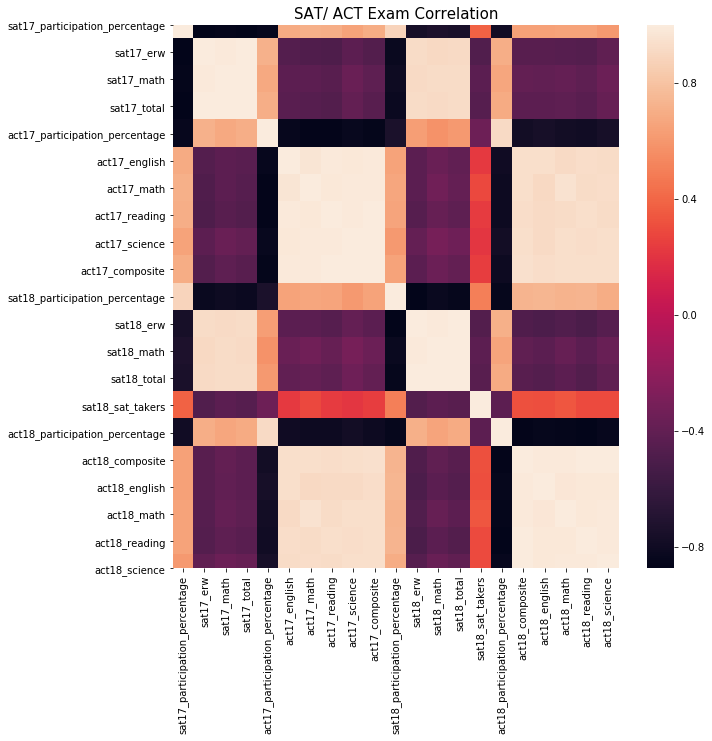

In [75]:
fig, ax = plt.subplots(figsize=(10,10)) #adjust plot size
sns.heatmap(final_data.corr()) #plots heatmap
ax.set_title('SAT/ ACT Exam Correlation', fontsize=15) #input title and adjust font size

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [76]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,35)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i], fontsize=15)#sets title and fontsize
        ax[i].set_xlabel(list_of_xlabels[i])#sets x-label
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

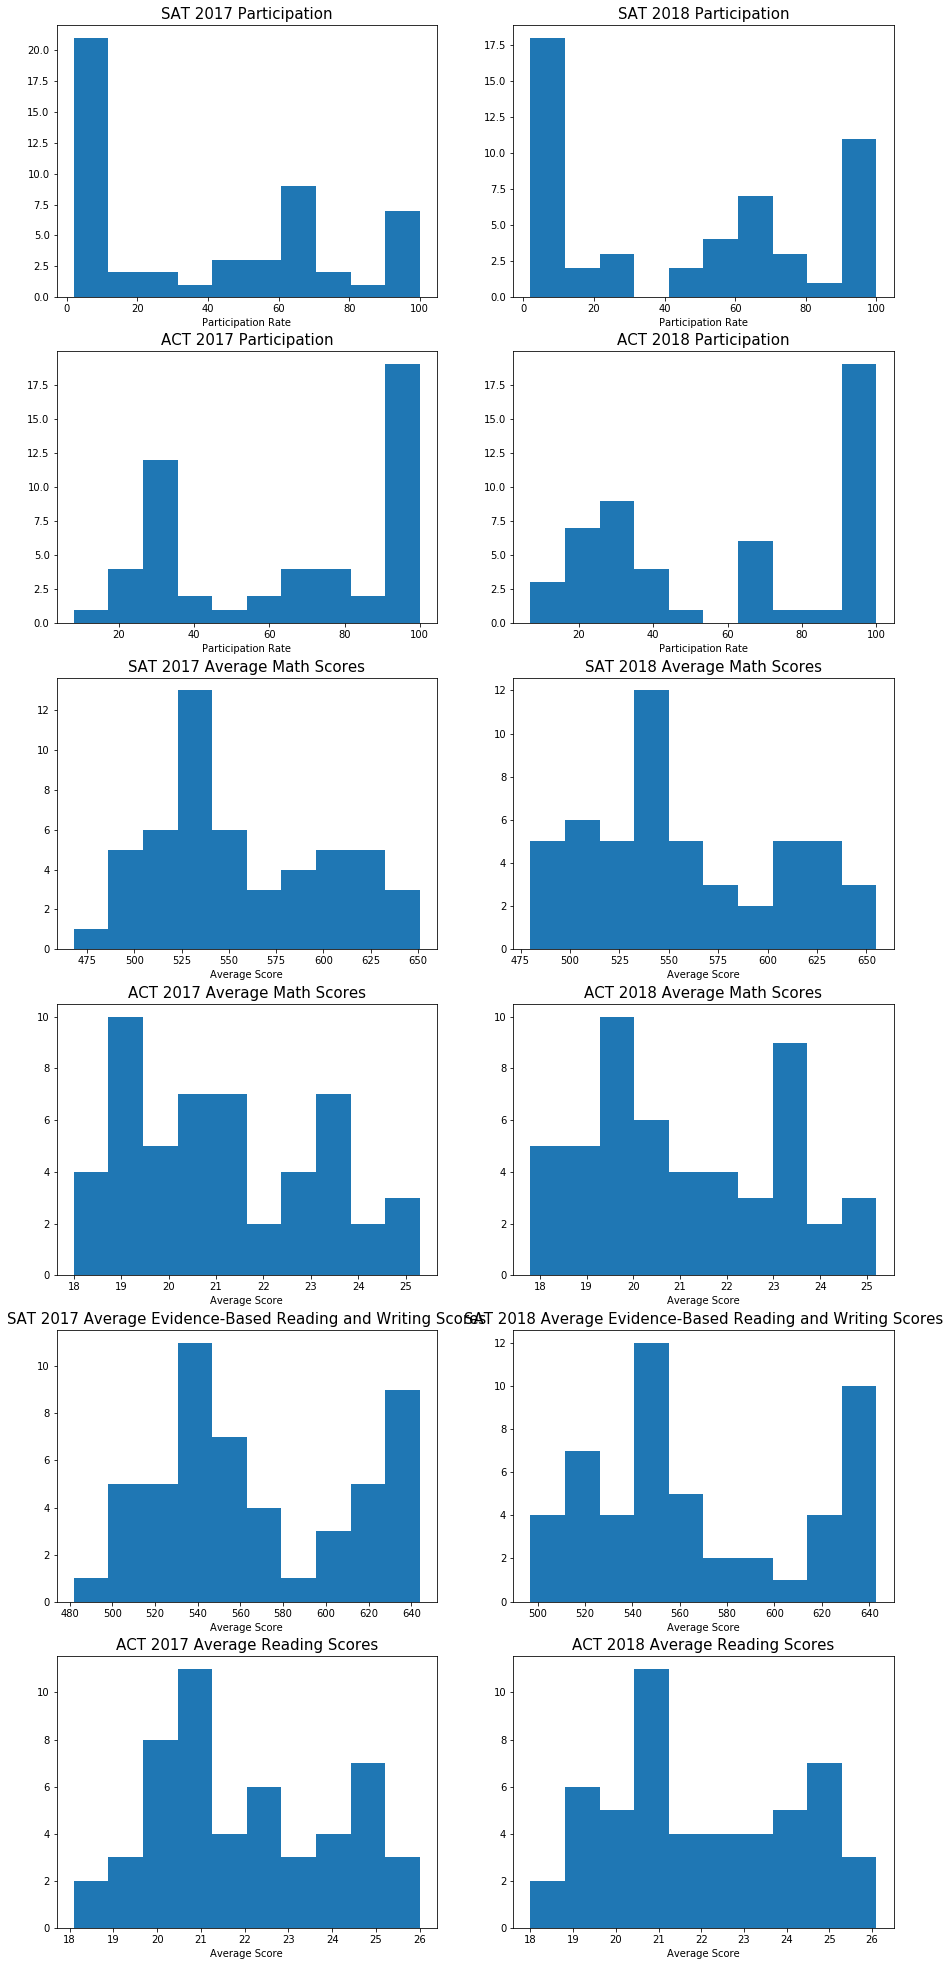

In [77]:
# Code
list_of_columns = ['sat17_participation_percentage',
                   'sat18_participation_percentage',
                   'act17_participation_percentage',
                   'act18_participation_percentage',
                   'sat17_math',
                   'sat18_math',
                   'act17_math',
                   'act18_math',
                   'sat17_erw',
                   'sat18_erw',
                   'act17_reading',
                   'act18_reading'
                  ]

list_of_titles = ['SAT 2017 Participation',
                 'SAT 2018 Participation',
                 'ACT 2017 Participation',
                 'ACT 2018 Participation',
                 'SAT 2017 Average Math Scores',
                 'SAT 2018 Average Math Scores',
                 'ACT 2017 Average Math Scores',
                 'ACT 2018 Average Math Scores',
                 'SAT 2017 Average Evidence-Based Reading and Writing Scores',
                 'SAT 2018 Average Evidence-Based Reading and Writing Scores',
                 'ACT 2017 Average Reading Scores',
                 'ACT 2018 Average Reading Scores'
                 ]

list_of_xlabels = ['Participation Rate',
                  'Participation Rate',
                  'Participation Rate',
                  'Participation Rate',
                  'Average Score',
                  'Average Score',
                  'Average Score',
                  'Average Score',
                  'Average Score',
                  'Average Score',
                  'Average Score',
                  'Average Score',
                  ]

subplot_histograms(final_data, list_of_columns, list_of_titles, list_of_xlabels)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [78]:
# Code
def subplot_scatter(dataframe, list_of_variables, list_of_titles, list_of_xlabels, list_of_ylabels):
    nrows = int(np.ceil(len(list_of_variables)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(13,15)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, variables in enumerate(list_of_variables): # Gives us an index value to get into all our lists
        ax[i].scatter(dataframe[variables[0]], dataframe[variables[1]]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i], fontsize=15)#sets title and fontsize
        ax[i].set_xlabel(list_of_xlabels[i])#sets x-label
        ax[i].set_ylabel(list_of_ylabels[i])#sets y-label

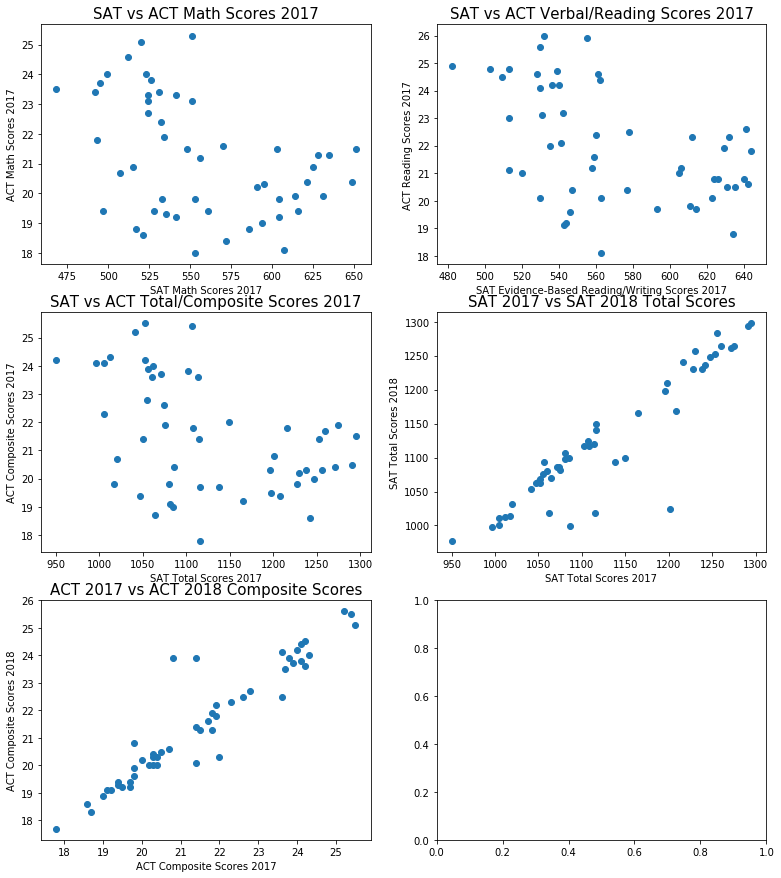

In [79]:
#list of variables should be a list of list containing the variables to plot against each other
list_of_variables = [['sat17_math','act17_math'],
                    ['sat17_erw', 'act17_reading'],
                    ['sat17_total', 'act17_composite'],
                    ['sat17_total', 'sat18_total'],
                    ['act17_composite', 'act18_composite']
                    ]

list_of_titles = ['SAT vs ACT Math Scores 2017',
                 'SAT vs ACT Verbal/Reading Scores 2017',
                 'SAT vs ACT Total/Composite Scores 2017',
                 'SAT 2017 vs SAT 2018 Total Scores',
                 'ACT 2017 vs ACT 2018 Composite Scores'
                 ]

list_of_xlabels = ['SAT Math Scores 2017',
                  'SAT Evidence-Based Reading/Writing Scores 2017',
                  'SAT Total Scores 2017',
                  'SAT Total Scores 2017',
                  'ACT Composite Scores 2017']

list_of_ylabels = ['ACT Math Scores 2017',
                  'ACT Reading Scores 2017',
                  'ACT Composite Scores 2017',
                  'SAT Total Scores 2018',
                  'ACT Composite Scores 2018'
                  ]
subplot_scatter(final_data, list_of_variables, list_of_titles, list_of_xlabels, list_of_ylabels)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

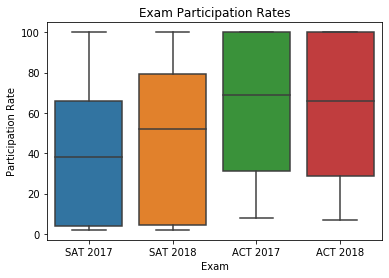

In [80]:
# Code
#boxplot for participation rates
boxplot_participation = sns.boxplot(data=final_data[['sat17_participation_percentage',
                                                     'sat18_participation_percentage',
                                                     'act17_participation_percentage',
                                                     'act18_participation_percentage']])

boxplot_participation.set(xlabel='Exam', ylabel='Participation Rate')#changing the labels
xtick_labels = ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018']#changing the xtick labels so they fit nicer
boxplot_participation.set_xticklabels(xtick_labels)
boxplot_participation.set_title('Exam Participation Rates');

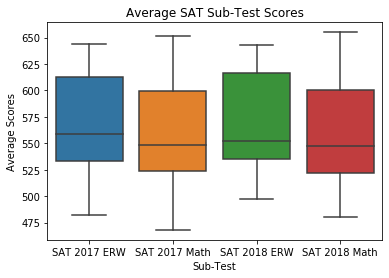

In [81]:
#boxplot for SAT subtests
boxplot_sat_subtests = sns.boxplot(data=final_data[['sat17_erw',
                                           'sat17_math',
                                           'sat18_erw',
                                           'sat18_math']])

boxplot_sat_subtests.set(xlabel='Sub-Test', ylabel='Average Scores')#changing the labels
xtick_labels = ['SAT 2017 ERW', 'SAT 2017 Math', 'SAT 2018 ERW', 'SAT 2018 Math']#changing the xtick labels
boxplot_sat_subtests.set_xticklabels(xtick_labels)
boxplot_sat_subtests.set_title('Average SAT Sub-Test Scores');

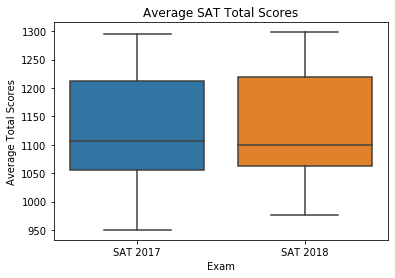

In [82]:
#boxplot for SAT Total Scores
boxplot_sat_total = sns.boxplot(data=final_data[['sat17_total', 'sat18_total']])

boxplot_sat_total.set(xlabel='Exam', ylabel='Average Total Scores')#changing the labels
xtick_labels = ['SAT 2017', 'SAT 2018']#changing the xtick labels
boxplot_sat_total.set_xticklabels(xtick_labels)
boxplot_sat_total.set_title('Average SAT Total Scores');#sets the title

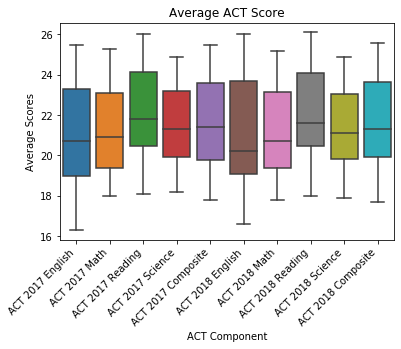

In [100]:
#boxplot for ACT sub-tests and composite score
boxplot_act_scores = sns.boxplot(data=final_data[['act17_english',
                                                 'act17_math',
                                                 'act17_reading',
                                                 'act17_science',
                                                 'act17_composite',
                                                 'act18_english',
                                                 'act18_math',
                                                 'act18_reading',
                                                 'act18_science',
                                                 'act18_composite'
                                                ]])

boxplot_act_scores.set(xlabel='ACT Component', ylabel='Average Scores')#changing the labels
xtick_labels = ['ACT 2017 English',
               'ACT 2017 Math',
               'ACT 2017 Reading',
               'ACT 2017 Science',
               'ACT 2017 Composite',
               'ACT 2018 English',
               'ACT 2018 Math',
               'ACT 2018 Reading',
               'ACT 2018 Science',
               'ACT 2018 Composite']#changing the xtick labels
boxplot_act_scores.set_xticklabels(xtick_labels, rotation=45, horizontalalignment='right')
boxplot_act_scores.set_title('Average ACT Score');#sets the title

#### Would be a good idea to help state your Inference of above Boxplot

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [84]:
sat_participants = pd.read_csv('../data/sat_takers.csv')

In [85]:
#data contains absolute numbers of the SAT takers so it provides us insights into how many people are taking the SAT exams
sat_participants.head()

,state,sat17_takers,2017_high_school_graduates,sat18_takers,2018_high_school_graduates,median_household_income
0,Alabama,2393,49102,2878,49844,42830
1,Alaska,2971,7770,3334,7796,71583
2,Arizona,20466,67909,20188,68627,50068
3,Arkansas,1065,30904,1591,31126,41262
4,California,226699,425864,262228,435365,61933


In [86]:
#merging in the sat participation percentage and total score and act18 participation percentage
sat_stats = pd.merge(left=sat_participants, right=final_data[['state','sat17_participation_percentage','sat18_participation_percentage','sat17_total','sat18_total','act18_participation_percentage']], on='state', how='left')

sat_stats

,state,sat17_takers,2017_high_school_graduates,sat18_takers,2018_high_school_graduates,median_household_income,sat17_participation_percentage,sat18_participation_percentage,sat17_total,sat18_total,act18_participation_percentage
0,Alabama,2393,49102,2878,49844,42830,5,6,1165,1166,100
1,Alaska,2971,7770,3334,7796,71583,38,43,1080,1106,33
2,Arizona,20466,67909,20188,68627,50068,30,29,1116,1149,66
3,Arkansas,1065,30904,1591,31126,41262,3,5,1208,1169,100
4,California,226699,425864,262228,435365,61933,53,60,1055,1076,27
5,Colorado,5896,55537,58790,57545,61303,11,100,1201,1025,30
6,Connecticut,43252,41529,44700,40782,70048,100,100,1041,1053,26
7,Delaware,10060,9572,11055,9809,59716,100,100,996,998,17
8,District of Columbia,4801,5305,4985,5397,71648,100,92,950,977,32
9,Florida,147058,177707,176746,181306,47463,83,97,1017,1014,66


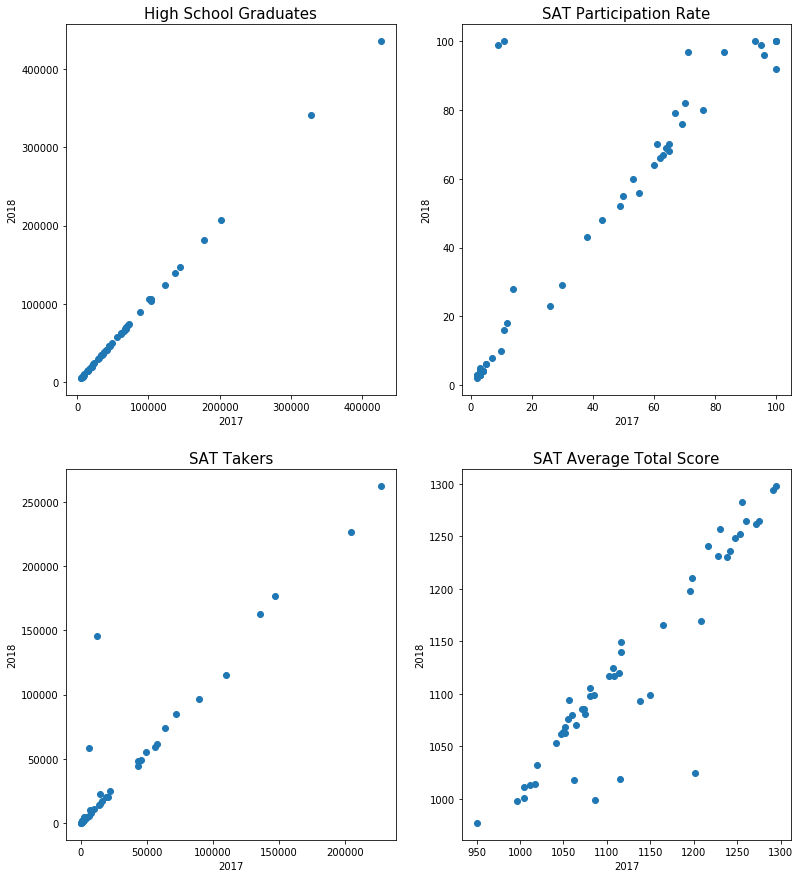

In [87]:

list_of_variables = [['2017_high_school_graduates','2018_high_school_graduates'],
                    ['sat17_participation_percentage','sat18_participation_percentage'],
                    ['sat17_takers','sat18_takers'],
                    ['sat17_total','sat18_total']]

list_of_titles = ['High School Graduates','SAT Participation Rate','SAT Takers','SAT Average Total Score']

list_of_xlabels = ['2017','2017','2017','2017']

list_of_ylabels = ['2018','2018','2018','2018']

subplot_scatter(sat_stats, list_of_variables, list_of_titles, list_of_xlabels, list_of_ylabels)

##### Inference of above chart?

In [88]:
sat_stats.describe()

,sat17_takers,2017_high_school_graduates,sat18_takers,2018_high_school_graduates,median_household_income,sat17_participation_percentage,sat18_participation_percentage,sat17_total,sat18_total,act18_participation_percentage
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,31351.862745,66396.803922,39032.392157,67838.372549,54453.607843,39.803922,46.627451,1126.098039,1124.666667,61.647059
std,51303.001114,78429.624535,60442.176084,80566.453667,9227.682697,35.276632,38.014187,92.494812,93.868561,34.080976
min,123.000000,5305.000000,148.000000,5397.000000,39680.000000,2.000000,2.000000,950.000000,977.000000,7.000000
25%,1885.000000,18820.500000,2223.500000,19027.000000,47695.000000,4.000000,4.500000,1055.500000,1062.500000,28.500000
50%,7205.000000,44319.000000,10161.000000,46235.000000,52622.000000,38.000000,52.000000,1107.000000,1099.000000,66.000000
75%,43581.500000,72678.000000,51974.500000,73638.500000,61112.500000,66.000000,79.500000,1212.000000,1220.000000,100.000000
max,226699.000000,425864.000000,262228.000000,435365.000000,73971.000000,100.000000,100.000000,1295.000000,1298.000000,100.000000


##### Inference of above Description table?

Text(0.5, 1, 'SAT Statistics Correlation')

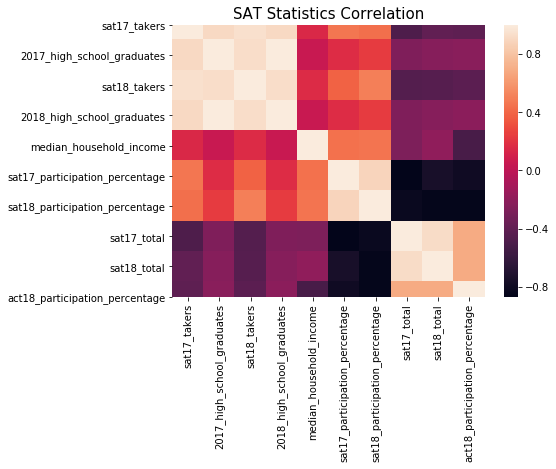

In [89]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(sat_stats.corr())
ax.set_title('SAT Statistics Correlation', fontsize=15)

#### Would be a good idea to help state your Inference of above Heatmap
#### Mentioning the variables to focus on, would help team mates understand better too

In [90]:
sat_stats.sort_values('median_household_income', ascending=False)

,state,sat17_takers,2017_high_school_graduates,sat18_takers,2018_high_school_graduates,median_household_income,sat17_participation_percentage,sat18_participation_percentage,sat17_total,sat18_total,act18_participation_percentage
20,Maryland,42919,62009,48040,63485,73971,69,76,1060,1080,31
21,Massachusetts,56024,73335,59382,73992,71919,76,80,1107,1125,25
8,District of Columbia,4801,5305,4985,5397,71648,100,92,950,977,32
1,Alaska,2971,7770,3334,7796,71583,38,43,1080,1106,33
6,Connecticut,43252,41529,44700,40782,70048,100,100,1041,1053,26
11,Hawaii,7352,13330,7880,14043,69592,55,56,1085,1099,89
30,New Jersey,72173,103175,84672,103598,69160,70,82,1056,1094,31
29,New Hampshire,14758,15446,14834,15401,66532,96,96,1052,1063,16
46,Virginia,57453,87930,61576,90456,64902,65,68,1102,1117,24
4,California,226699,425864,262228,435365,61933,53,60,1055,1076,27


In [91]:
#2018 sat and act participation rate with the student population.
sat_stats.loc[:,['state','2018_high_school_graduates','sat18_participation_percentage','act18_participation_percentage']]

,state,2018_high_school_graduates,sat18_participation_percentage,act18_participation_percentage
0,Alabama,49844,6,100
1,Alaska,7796,43,33
2,Arizona,68627,29,66
3,Arkansas,31126,5,100
4,California,435365,60,27
5,Colorado,57545,100,30
6,Connecticut,40782,100,26
7,Delaware,9809,100,17
8,District of Columbia,5397,92,32
9,Florida,181306,97,66


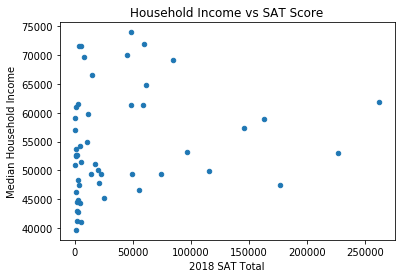

In [92]:
sat_stats.plot.scatter(x='sat18_takers',y='median_household_income')
plt.title('Household Income vs SAT Score')
plt.xlabel('2018 SAT Total')
plt.ylabel('Median Household Income');

##### Inference of above chart?

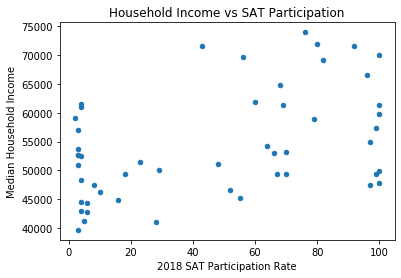

In [93]:
sat_stats.plot.scatter(x='sat18_participation_percentage',y='median_household_income')
plt.title('Household Income vs SAT Participation')
plt.xlabel('2018 SAT Participation Rate')
plt.ylabel('Median Household Income');

##### Inference of above chart?

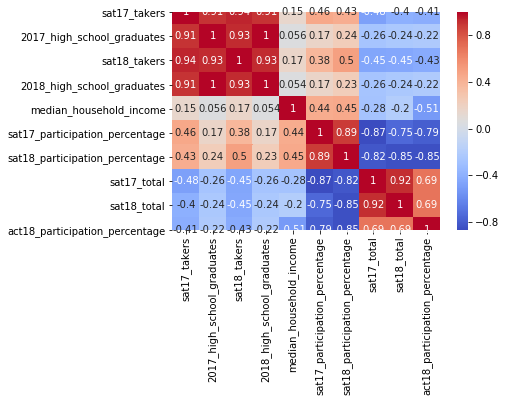

In [94]:
sns.heatmap(sat_stats.corr(), annot=True, cmap='coolwarm')

##### Inference of above chart?

In [95]:
#to filter out states where ACT 2018 participation rates are more >= 90%
second_scatter = sat_stats[sat_stats['act18_participation_percentage']<90].sort_values(by='median_household_income',ascending=False)

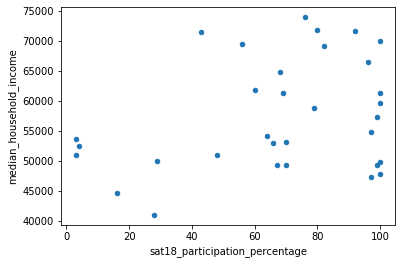

In [96]:
second_scatter.plot.scatter(x='sat18_participation_percentage',y='median_household_income')

##### Inference of above chart?

In [97]:
#shortlisted list of states to focus on
sat_stats[(sat_stats['act18_participation_percentage']<50)&(sat_stats['sat18_participation_percentage']<50)]

,state,sat17_takers,2017_high_school_graduates,sat18_takers,2018_high_school_graduates,median_household_income,sat17_participation_percentage,sat18_participation_percentage,sat17_total,sat18_total,act18_participation_percentage
1,Alaska,2971,7770,3334,7796,71583,38,43,1080,1106,33
37,Oregon,15866,36704,17476,36734,51075,43,48,1108,1117,42


#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

We can take a look at the boxplots we have plotted to analyse the distributions of the variables that we have in our data.

Participation Rate
First up, let us take a look at the participation rates for the various exams. The SAT for 2017 and 2018 as well as the ACT for 2017 and 2018. We can tell that in general, most states have a lower SAT participation rate compared to ACT participation rate. This can be seen they have lower quartiles compared to the ACT exams. The SAT exams have lower Q1, median, Q3 and a longer whisker going up to the 100% mark, whereas the Q3 mark for the ACT exams are already at the 100% mark and a longer whisker towards the lower rates. Based on the histograms, I wouldn't really say that there is much of a skew. There are a high number of states with less than 10% SAT participation and a high number of states with 100% ACT participation.

SAT Sub-Test Scores
Taking a look at the boxplots for the average scores of the different SAT sub-tests, we can tell that majority of the results range from around 525(Q1) to 620(Q3), with median scores around 550 range. Looking at the histograms, we can that a high number of states have average scores of 525 to 550 for Math, whereas for Evidence-Based Reading and Writing, there looks to be high number of states with scores either at the 540 to 560 range and at the 630 to 640 range.

ACT Scores
Looking at the boxplots for the ACT scores, they look at have quite a big spread, but the bulk of them are at the 19(Q1) to 24(Q3) range and a median of around 21.

Based on all the boxplots observed, there were no outliers spotted, which means that there is no state which either did exceptionally good or bad compared to the rest of the states.




In [101]:
## break up the above into bullet points so it is easier for team mates to consume

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Yes we are able to observe a couple of normally distributed histograms.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

Math
The SAT Math scores look normally distributed but the ACT Math scores do no look normally distributed.

Reading
The reading scores do not look normally distributed as they look to have a couple of peaks.

Participation Rates
These distributions are not normally distributed as they seem to have higher frequencies at both ends of the data.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

As participation rates do not follow a normal distribution, statistical inference within each specific data would not make much sense. However, it would make a good comparison between both data sets. When we break it down to each state, these percentages should be based on the same population of students. A high participation rate in one test would usually mean a lower participation rate in the other. If the sum of participation rate in a state is more than 100%, this could mean that some students take both SAT and ACT. The only way these statistical inference would not be accurate is if the method/basis that SAT and ACT get their percentages are different.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

I do not think it is appropriate to compare SAT and ACT math scores against each other as they are based on two different separate tests and have no relationship with one another, even the students taking them are different. It is like comparing apples and oranges, both are fruits, but they are still different from each other. The tests 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [98]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [99]:
sat_stats[(sat_stats['sat17_participation_percentage']<75)&(sat_stats['sat18_participation_percentage']>90)]

,state,sat17_takers,2017_high_school_graduates,sat18_takers,2018_high_school_graduates,median_household_income,sat17_participation_percentage,sat18_participation_percentage,sat17_total,sat18_total,act18_participation_percentage
5,Colorado,5896,55537,58790,57545,61303,11,100,1201,1025,30
13,Illinois,12402,144616,145919,146800,57444,9,99,1115,1019,43
39,Rhode Island,7205,10158,10161,10464,54891,71,97,1062,1018,15


The states I have chosen are Colorado, Illinois and Rhode Island.

Based on reseach, it seems that between 2017 and 2018, Colorado made in mandatory to take the SAT as part of the statewide high school accountability, which explains the huge surge in participation rates.

As for Illinois, though the SAT was not compulsory, The College Board won a bid to give its exam to all public high school juniors in Illinois, which means that ACT exams are out and the SATs are in.

However, there is yet to be any explanation for the increase in participation rates for Rhode Island.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

It seems that participation rates and total scores are negatively correlated. Generally, when a state experiences a huge increase in the participation rates, their total score seems to drop quite drastically too. However, one factor I would keep in mind when selecting the state to focus on would be the median household income. It seems that states with a higher median household income tend to have higher SAT participation rate. With a generally higher household income, it would mean it would be easier to get students in the state to take the SAT exams as they can better afford it and would also have better access to facilities and support to aid them in their studies, which would also better enable them to achieve a higher SAT score.

Another factor to take note of is that we should try to target states where ACT participation rate is not 100% as a 100% ACT participation rate would probably mean that the ACT test is mandatory in that particular state which would mean that it would be harder to implement a strategy to increase SAT participation rates.

Considering the above-mentioned factors, the state that I recommend the College Board focuses its efforts on would be Alaska. This could be done by one of the methods applicable to Colorado or Illinois, either for the College Board to bid with the specified country's exam board to give its exams to the students of that state or by trying to make the SAT exams mandatory in that state.

With Alaska having the highest median household income out of our shortlisted list , it stands to say that students will better able to afford for any examination fees required, which would therefore mean that it will be easier to get the students to take the tests. Having a good access to facilities and support to aid them in their studies would also mean that the state's SAT score might not be so negatively affected when more students start taking the tests. Also, with a relatively smaller population, each additional student who takes the SAT exams would results in a bigger increase in participation rate. 